In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
df = pd.read_csv("electrical_data.csv")
df.describe()

,Hour,IsDaytime (9-19),WeekDay,CalendarDay,CalendarMonth,CalendarYear,IsWeekend,temperature(C°),Humid temperature (C °),Dew Point Temperature (C °),Wind speed (m / s),Wind direction (degrees),Electricity
count,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.0,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000
mean,11.503817,0.541864,3.935660,15.489277,6.334424,2018.0,0.276263,21.333370,18.003962,15.662959,2.628826,205.633951,17.275391
std,6.920950,0.498275,2.018181,8.824378,3.405909,0.0,0.447176,6.198427,4.671496,5.328097,1.644015,97.669370,12.697173
min,0.000000,0.000000,1.000000,1.000000,1.000000,2018.0,0.000000,7.000000,6.300000,-4.100000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,2.000000,8.000000,3.000000,2018.0,0.000000,16.300000,14.000000,11.700000,1.500000,123.000000,7.590000
50%,12.000000,1.000000,4.000000,15.000000,6.000000,2018.0,0.000000,21.700000,18.500000,16.500000,2.300000,204.000000,13.710000
75%,18.000000,1.000000,6.000000,23.000000,9.000000,2018.0,1.000000,26.400000,22.100000,20.200000,3.500000,290.000000,25.480000
max,23.000000,1.000000,7.000000,31.000000,12.000000,2018.0,1.000000,41.100000,27.200000,25.700000,12.500000,360.000000,56.540000


In [3]:
df.head()

,Date,Hour,IsDaytime (9-19),Season,WeekDay,CalendarDay,CalendarMonth,CalendarYear,IsWeekend,temperature(C°),Humid temperature (C °),Dew Point Temperature (C °),Relative humidity(%),Wind speed (m / s),Wind direction (degrees),Pressure at station height (hPa),Sea level pressure (hPa),Total amount of clouds,Electricity
0,01/01/2018,0,0,Winter,2,1,1,2018,0,11.6,8.7,5.4,62,7.0,190,1010.4,1014.2,5,1.51
1,01/01/2018,1,0,Winter,2,1,1,2018,0,11.6,8.7,5.4,62,7.0,190,1010.4,1014.2,5,1.47
2,01/01/2018,2,0,Winter,2,1,1,2018,0,11.6,8.7,5.4,62,7.0,190,1010.4,1014.2,5,1.46
3,01/01/2018,3,0,Winter,2,1,1,2018,0,11.1,9.3,7.4,81,1.5,290,1010.7,1014.5,7,1.46
4,01/01/2018,4,0,Winter,2,1,1,2018,0,11.1,9.3,7.4,81,1.5,290,1010.7,1014.5,7,1.45


In [4]:
df["relative_humidity"] = pd.to_numeric(df["Relative humidity(%)"], errors="coerce")
df["Season"] = df["Season"].astype(str)
df["station_pressure"] = pd.to_numeric(df["Pressure at station height (hPa)"], errors="coerce")
df["sea_level_pressure"] = pd.to_numeric(df["Sea level pressure (hPa)"], errors="coerce")
df["clouds_amount"] = pd.to_numeric(df["Total amount of clouds"], errors="coerce")

df = df.dropna()
df = df.drop(["Date", "Relative humidity(%)", "Sea level pressure (hPa)",
              "Pressure at station height (hPa)", "Total amount of clouds", "CalendarYear"], axis=1)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8160 entries, 0 to 8252
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hour                         8160 non-null   int64  
 1   IsDaytime (9-19)             8160 non-null   int64  
 2   Season                       8160 non-null   object 
 3   WeekDay                      8160 non-null   int64  
 4   CalendarDay                  8160 non-null   int64  
 5   CalendarMonth                8160 non-null   int64  
 6   IsWeekend                    8160 non-null   int64  
 7   temperature(C°)              8160 non-null   float64
 8   Humid temperature (C °)      8160 non-null   float64
 9   Dew Point Temperature (C °)  8160 non-null   float64
 10  Wind speed (m / s)           8160 non-null   float64
 11  Wind direction (degrees)     8160 non-null   int64  
 12  Electricity                  8160 non-null   float64
 13  relative_humidity 

Text(0.5, 1.0, 'Correlation Heatmap')

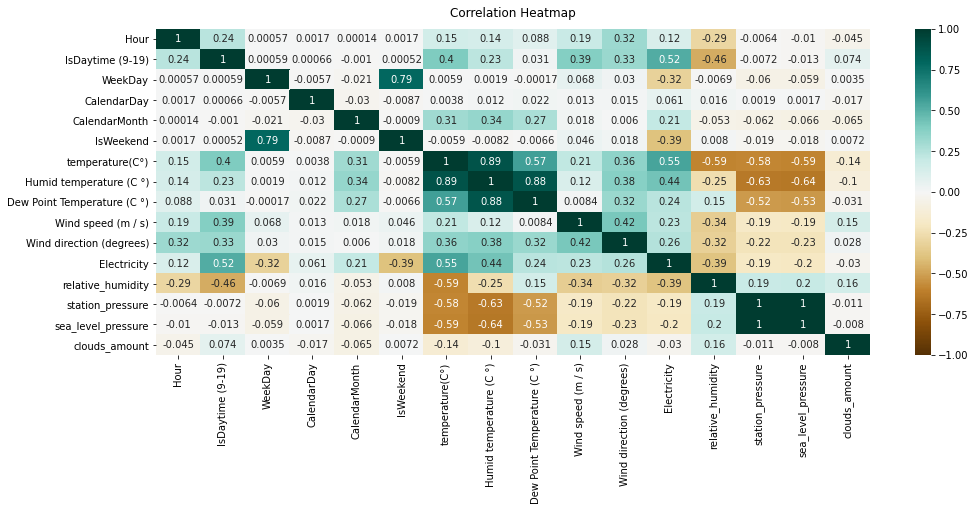

In [6]:
import seaborn
corr_matrix = df.corr()
plt.figure(figsize=(16, 6))
heatmap = seaborn.heatmap(corr_matrix, vmin=-1,
                          vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)


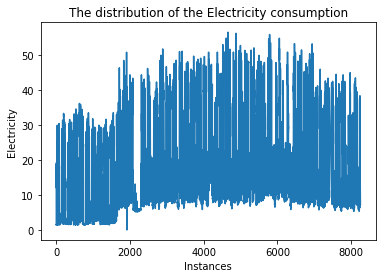

In [7]:
plt.plot(df["Electricity"])
plt.title("The distribution of the Electricity consumption")
plt.ylabel("Electricity")
plt.xlabel("Instances")
plt.show()


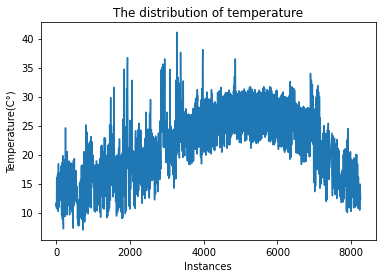

In [8]:
plt.plot(df["temperature(C°)"])
plt.title("The distribution of temperature")
plt.ylabel("Temperature(C°)")
plt.xlabel("Instances")
plt.show()

# The temperature distribution resembles a gaussian of sorts, maybe thats important
# We can identify the peak as probably the Summer season where temps are higher

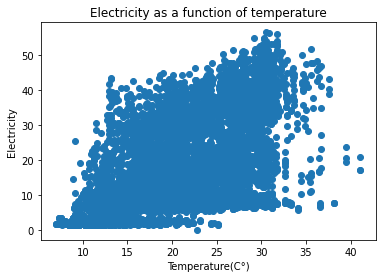

In [9]:
plt.scatter(df["temperature(C°)"], df["Electricity"])
plt.title("Electricity as a function of temperature")
plt.xlabel("Temperature(C°)")
plt.ylabel("Electricity")
plt.show()


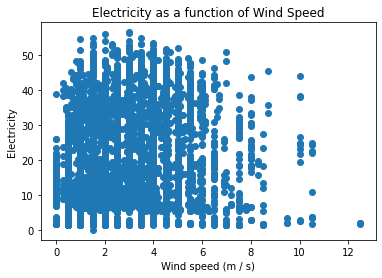

In [10]:
plt.scatter(df["Wind speed (m / s)"], df["Electricity"])
plt.title("Electricity as a function of Wind Speed")
plt.xlabel("Wind speed (m / s)")
plt.ylabel("Electricity")
plt.show()

# We cannot deduce any valuable relationship between the Wind speed and electricity

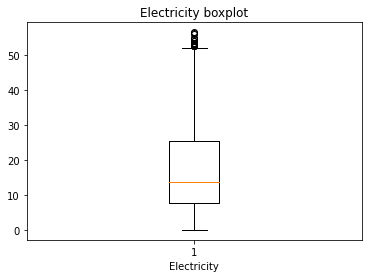

In [11]:
plt.boxplot(df["Electricity"])
plt.title("Electricity boxplot")
plt.xlabel("Electricity")
plt.show()
# we can see that the majority of electricity values are between 10 and 25 and the mean is around 17

In [12]:
df["WeekDay"].value_counts()

3    1242
1    1224
2    1212
7    1173
5    1146
4    1089
6    1074
Name: WeekDay, dtype: int64

In [13]:
# Apply one-hot endcoding

df = df.join(pd.get_dummies(df['Hour'], prefix="Hour"))
df = df.join(pd.get_dummies(df['WeekDay'], prefix="WeekDay"))
df = df.join(pd.get_dummies(df['CalendarMonth'], prefix="CalendarMonth"))
df = df.drop(["Hour", "CalendarMonth", "WeekDay", "Season"], axis=1)
df.columns


Index(['IsDaytime (9-19)', 'CalendarDay', 'IsWeekend', 'temperature(C°)',
       'Humid temperature (C °)', 'Dew Point Temperature (C °)',
       'Wind speed (m / s)', 'Wind direction (degrees)', 'Electricity',
       'relative_humidity', 'station_pressure', 'sea_level_pressure',
       'clouds_amount', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'WeekDay_1', 'WeekDay_2', 'WeekDay_3', 'WeekDay_4', 'WeekDay_5',
       'WeekDay_6', 'WeekDay_7', 'CalendarMonth_1', 'CalendarMonth_2',
       'CalendarMonth_3', 'CalendarMonth_4', 'CalendarMonth_5',
       'CalendarMonth_6', 'CalendarMonth_7', 'CalendarMonth_8',
       'CalendarMonth_9', 'CalendarMonth_10', 'CalendarMonth_11',
       'CalendarMonth_12'],
      dtype='object')

In [14]:
df.head()

,IsDaytime (9-19),CalendarDay,IsWeekend,temperature(C°),Humid temperature (C °),Dew Point Temperature (C °),Wind speed (m / s),Wind direction (degrees),Electricity,relative_humidity,...,CalendarMonth_3,CalendarMonth_4,CalendarMonth_5,CalendarMonth_6,CalendarMonth_7,CalendarMonth_8,CalendarMonth_9,CalendarMonth_10,CalendarMonth_11,CalendarMonth_12
0,0,1,0,11.6,8.7,5.4,7.0,190,1.51,62.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,11.6,8.7,5.4,7.0,190,1.47,62.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,11.6,8.7,5.4,7.0,190,1.46,62.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,11.1,9.3,7.4,1.5,290,1.46,81.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,11.1,9.3,7.4,1.5,290,1.45,81.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
cols = list(set(df.columns) - set(['Electricity'])) 

X = df[cols].copy()
y = df['Electricity'].copy()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# We've come to the conclusion that MinMaxScaler works a lot better with KNN
# and has little effect on LinearRegression and the Regression tree
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Standard Scaling
# sc = StandardScaler()
# X = sc.fit_transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print("X Train:", X_train.shape, len(X_train)/len(X))
print("X test:", X_test.shape, len(X_test)/len(X))

print("Y Train:", y_train.shape, len(y_train)/len(X))
print("Y Test:", y_test.shape, len(y_test)/len(X))


X Train: (6528, 55) 0.8
X test: (1632, 55) 0.2
Y Train: (6528,) 0.8
Y Test: (1632,) 0.2


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

<AxesSubplot:>

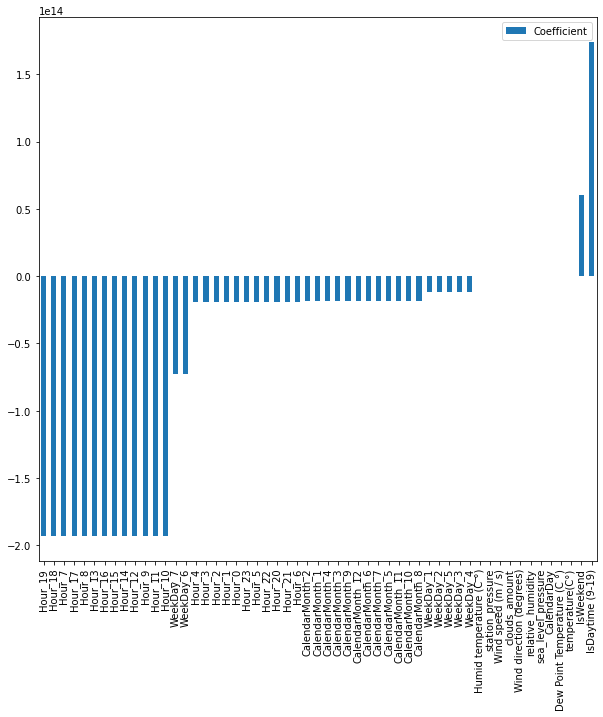

In [19]:
pd.DataFrame(regressor.coef_, cols, columns=['Coefficient']).sort_values("Coefficient").plot(kind='bar', figsize=(10,10))

In [20]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))

print("R^2 score:", regressor.score(X_test, y_test))



Mean Absolute Error: 5.770757314644607
Mean Squared Error: 54.3132027114569
Root Mean Squared Error: 7.369749162044588
R^2 score: 0.6484850905607629


In [21]:
from sklearn.dummy import DummyRegressor
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train, y_train)

y_dumb_pred = dummy_regressor.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_dumb_pred))


Mean Squared Error: 154.52752773689994


In [22]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


,Actual,Predicted
1541,1.98,10.828125
6373,6.75,18.773438
1180,2.60,2.218750
7739,5.61,14.609375
1400,7.69,21.039062
...,...,...
3693,12.42,16.843750
7866,10.90,13.375000
7056,9.60,11.375000
8030,14.12,22.523438


In [23]:
from sklearn.neighbors import KNeighborsRegressor

mse_vals_test = []
k_range = range(1, 21)
best_knn_model = None

for K in k_range:
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  # fit the model
    pred = model.predict(X_test) # make prediction on test set
    error_test = metrics.mean_squared_error(y_test, pred) 
    mse_vals_test.append(error_test) 
    print(f'MSE on test for k={K} is: {error_test}')
    if error_test <= min(mse_vals_test):
        best_knn_model = model
        
print(f"Best KNN model has k={best_knn_model.n_neighbors}")

MSE on test for k=1 is: 57.81659650735293
MSE on test for k=2 is: 42.75947964154411
MSE on test for k=3 is: 33.82083886846405
MSE on test for k=4 is: 27.35264972426471
MSE on test for k=5 is: 25.31344855392157
MSE on test for k=6 is: 25.476183387799566
MSE on test for k=7 is: 26.12623630077031
MSE on test for k=8 is: 26.767396312040443
MSE on test for k=9 is: 27.47701654411765
MSE on test for k=10 is: 28.171818857843135
MSE on test for k=11 is: 28.705262036136766
MSE on test for k=12 is: 29.67521180768314
MSE on test for k=13 is: 30.253138118546232
MSE on test for k=14 is: 31.073938145883353
MSE on test for k=15 is: 31.662062946350762
MSE on test for k=16 is: 32.37493047210095
MSE on test for k=17 is: 32.76023971817966
MSE on test for k=18 is: 33.06901894271211
MSE on test for k=19 is: 33.401119583740694
MSE on test for k=20 is: 33.749943591299015
Best KNN model has k=5


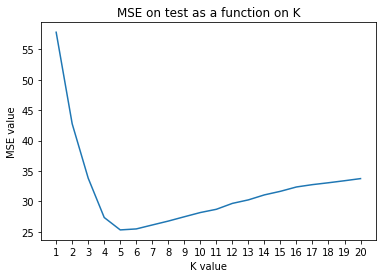

In [28]:
plt.plot(k_range, mse_vals_test)
plt.title("MSE on test as a function on K")
plt.xlabel("K value")
plt.ylabel("MSE value")
plt.xticks(k_range)
plt.show()


In [29]:
knn_y_pred = best_knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': knn_y_pred})


,Actual,Predicted
1541,1.98,7.142
6373,6.75,8.948
1180,2.60,2.258
7739,5.61,5.756
1400,7.69,20.050
...,...,...
3693,12.42,13.878
7866,10.90,10.332
7056,9.60,8.786
8030,14.12,14.402


In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_mse_test = []
tree_mse_train = []
cross_val_mse = []

tree_max_depth = range(1, 40)
best_tree = None
tree_for_display = None
depth_for_display = 6

for depth in tree_max_depth:
    dt_regressor = DecisionTreeRegressor(random_state=0, max_depth=depth)
    dt_regressor.fit(X_train, y_train)

    y_tree_pred = dt_regressor.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_tree_pred)

    print("MSE:", mse)
    tree_mse_test.append(mse)
    tree_mse_train.append(metrics.mean_squared_error(y_train, dt_regressor.predict(X_train)))

    if mse <= min(tree_mse_test):
        best_tree = dt_regressor

    if depth == depth_for_display:
        tree_for_display = dt_regressor
        
print(f"Best Tree has depth of {best_tree.get_depth()}")


MSE: 111.89524524610869
MSE: 75.85269401730156
MSE: 61.213026899075956
MSE: 54.068499953907086
MSE: 47.82314989594592
MSE: 44.738848160468585
MSE: 38.38462306045951
MSE: 35.97183494589354
MSE: 34.35110898615986
MSE: 31.40074460360755
MSE: 28.550451606287826
MSE: 26.241214685879402
MSE: 26.30643355206397
MSE: 26.793634817878523
MSE: 26.365986973062135
MSE: 26.107346593142317
MSE: 26.042968263472293
MSE: 25.312094708486967
MSE: 25.706466245922545
Best Tree has depth of 18


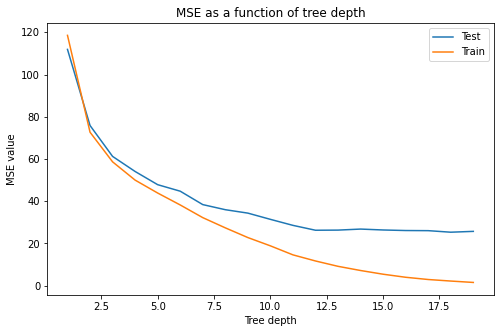

In [37]:
plt.figure(figsize=(8,5))
plt.plot(tree_max_depth, tree_mse_test, label="Test")
plt.plot(tree_max_depth, tree_mse_train, label="Train")
plt.title("MSE as a function of tree depth")
plt.xlabel("Tree depth")
plt.ylabel("MSE value")
plt.legend()
plt.show()

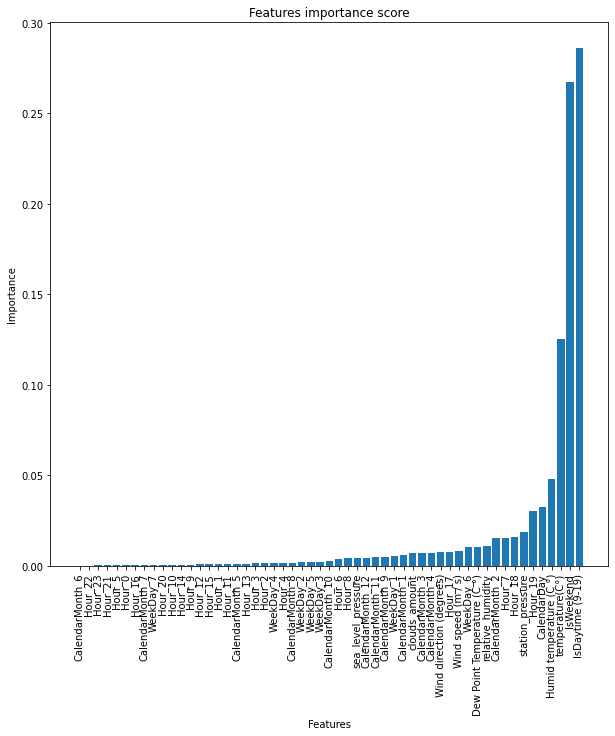

In [28]:
from operator import itemgetter

features_scores = list(
    zip(best_tree.feature_importances_, cols))
features_scores.sort(key=itemgetter(0))
scores = [x[0] for x in features_scores]
features = [x[1] for x in features_scores]

plt.figure(figsize=(10,10))

plt.bar(features, scores)
plt.xticks(rotation=90)

plt.title('Features importance score')
plt.ylabel('Importance')
plt.xlabel('Features')

plt.show()


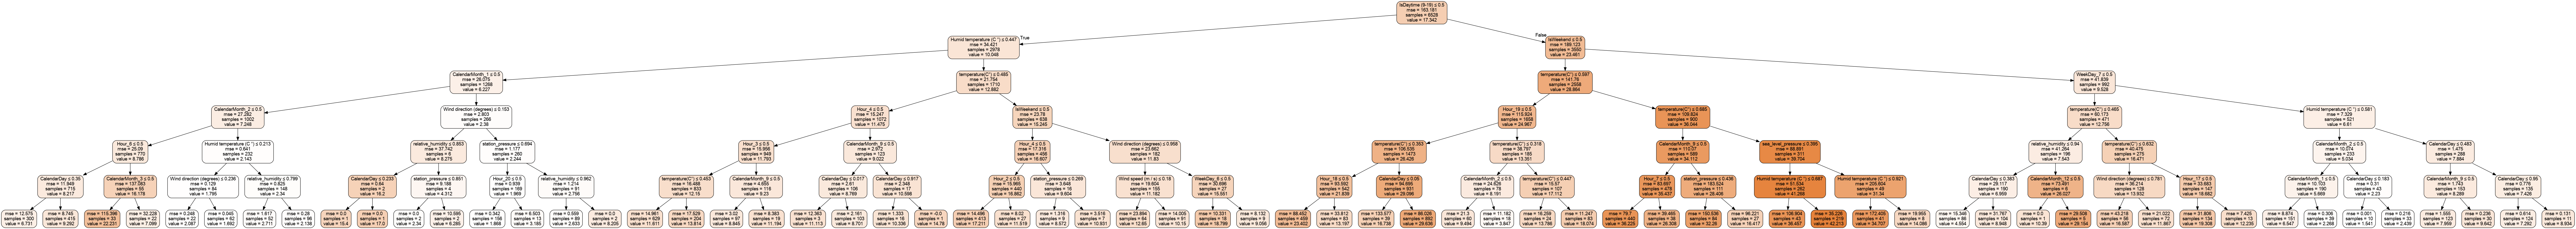

In [29]:
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image

dot_data = StringIO()
export_graphviz(tree_for_display, out_file=dot_data,
                feature_names=cols,
                filled=True,
                rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mytree.png')
Image(graph.create_png())


In [30]:
from sklearn.ensemble import RandomForestRegressor

tree_max_depth = range(1, 2)
for depth in tree_max_depth:

    random_forest = RandomForestRegressor(max_depth=depth)
    random_forest.fit(X_train, y_train)

    y_tree_pred = random_forest.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_tree_pred)
    print("MSE:", mse)


MSE: 111.88838940526587


In [41]:
print('Naive model Mean Squared Error:', metrics.mean_squared_error(y_test, dummy_regressor.predict(X_test)))
print("Linear Regression MSE:", metrics.mean_squared_error(y_test, regressor.predict(X_test)))
print(f"Best KNN model, k={best_knn_model.n_neighbors}, MSE: {metrics.mean_squared_error(y_test, best_knn_model.predict(X_test))}")
print(f"Best Regression Tree model, with depth={best_tree.get_depth()}, MSE: {metrics.mean_squared_error(y_test, best_tree.predict(X_test))}")


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Linear Regression MAPE:", mean_absolute_percentage_error(y_test, regressor.predict(X_test)))
print("KNN MAPE:", mean_absolute_percentage_error(y_test, best_knn_model.predict(X_test)))
print("Regressor Tree MAPE:", mean_absolute_percentage_error(y_test, best_tree.predict(X_test)))


Naive model Mean Squared Error: 154.52752773689994
Linear Regression MSE: 54.3132027114569
Best KNN model, k=5, MSE: 25.31344855392157
Best Regression Tree model, with depth=18, MSE: 25.312094708486967
Linear Regression MAPE: 71.46855552698116
KNN MAPE: 28.243120008466978
Regressor Tree MAPE: 21.789155856191638


In [613]:
# Lets build a classification tree using "Electricity" to predict "IsDaytime"
X = df["Electricity"].copy()
y = df['IsDaytime (9-19)'].copy()

tree_model = DecisionTreeClassifier(max_depth=1)
tree_model.fit(X.to_numpy().reshape(-1,1), y)


DecisionTreeClassifier(max_depth=1)

In [614]:
probabilities = tree_model.predict_proba(X.to_numpy().reshape(-1, 1))[:,1]
daytime_elec = X.to_frame()
daytime_elec["isDaytime_prob"] = probabilities
daytime_elec["isDaytime"] = y
daytime_elec

,Electricity,isDaytime_prob,isDaytime
0,1.51,0.356952,0
1,1.47,0.356952,0
2,1.46,0.356952,0
3,1.46,0.356952,0
4,1.45,0.356952,0
...,...,...,...
8248,12.84,0.356952,1
8249,11.19,0.356952,0
8250,9.21,0.356952,0
8251,9.39,0.356952,0


Text(0, 0.5, 'Electricity')

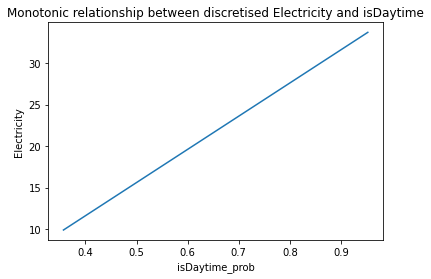

In [605]:
fig = plt.figure()
fig = daytime_elec.groupby(['isDaytime_prob'])['Electricity'].mean().plot()
fig.set_title(
    'Monotonic relationship between discretised Electricity and isDaytime')
fig.set_ylabel('Electricity')

# isDaytime seems like a good predictor for Electricity

In [606]:
pd.concat([daytime_elec.groupby(['isDaytime_prob'])['Electricity'].min(),
           daytime_elec.groupby(['isDaytime_prob'])['Electricity'].max()], axis=1)


,Electricity,Electricity
isDaytime_prob,,
0.356952,0.00,20.64
0.952418,20.65,56.54


In [607]:
electricity_mean = df["Electricity"].mean()

df["Electricity_class"] = df["Electricity"] > 20.64

df2 = df.drop("Electricity", axis=1)


In [608]:
df2["Electricity_class"].value_counts()

False    5617
True     2543
Name: Electricity_class, dtype: int64

In [609]:
cols = list(df2.columns)
cols.remove("Electricity_class")
X = df2[cols]
y = df2["Electricity_class"]

In [610]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print("X Train:", X_train.shape, len(X_train)/len(X))
print("X test:", X_test.shape, len(X_test)/len(X))

print("Y Train:", y_train.shape, len(y_train)/len(X))
print("Y Test:", y_test.shape, len(y_test)/len(X))


X Train: (6528, 55) 0.8
X test: (1632, 55) 0.2
Y Train: (6528,) 0.8
Y Test: (1632,) 0.2


In [611]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))

Accuracy: 0.9123774509803921
Recall: 0.8767395626242545
Precision: 0.8448275862068966
